In [1]:

from IPython.display import display, Markdown, Latex
h1 = lambda x: display(Markdown('# '+str(x)))
h3 = lambda x: display(Markdown('### '+str(x)))
h4 = lambda x: display(Markdown('#### '+ (str(x).replace(' ','&nbsp;') if str(x) else 'None')))
h5 = lambda x: display(Markdown('##### '+ (str(x).replace(' ','&nbsp;') if str(x) else 'None')))
bl = lambda x: display(Markdown('##### <font color="blue"> %s </font>'%(str(x).replace(' ','&nbsp;') if str(x) else 'None')))
rd = lambda x: display(Markdown('##### <font color="red"> %s </font>'%(str(x).replace(' ','&nbsp;') if str(x) else 'None')))
rd1 = lambda x: display(Markdown('# <font color="red"> %s </font>'%(str(x).replace(' ','&nbsp;') if str(x) else 'None')))
gra = lambda x: display(Markdown('##### <font color="gray"> %s </font>'%(str(x).replace(' ','&nbsp;') if str(x) else 'None')))
itc = lambda x: display(Markdown('***'+str(x.strip()) + '***' ))
pl = lambda: print('\n'+'#'*100 + '\n')
pl2 = lambda: print('\n'+'='*100 + '\n')
pls = lambda: print('\n'+'#'*50 +' Start '+'#'*50 + '\n')
pn = lambda x=5: print('\n'*x)


## Hand Made Neural Network

https://144.34.140.210:8579/notebooks/Git_Qiliang/ML_ANN_Gradiant_Decent/Backpropagation.ipynb

In [2]:
import pdb
bp = pdb.set_trace

import random
import uuid
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [3]:
def relu(x):
    if x>0:
        return x
    else:
        return 0
# activation_func = np.vectorize(relu)  
activation_func = np.vectorize(lambda x: x) 
         
class Weight:
    def __init__(self,m,n):
        self.m = m
        self.n = n
        self.val = np.random.randn(m,n)
        self.normalize()
        
    def normalize(self):
        self.val = self.val/self.val.sum()

class Layer:
    def __init__(self,n,id=None):
        self.val = None
        self.id = id
        self.input_weight = None
        self.output_weight = None
        self.pre_layer = None
        self.next_layer = None
        self.n = n
        self.delta_weight = None
        
        
    def full_connect(self,other):
        m = self.n
        n = other.n
        weight = Weight(m,n)
        self.output_weight = weight
        other.input_weight = weight
        
        self.next_layer = other
        other.pre_layer = self
    
    def stats(self):
        print("n:",self.n)
        if self.output_weight:
            print('Weight:',self.output_weight.val.shape)
        print()
            
    def pull_in(self,input_list):
        self.val = np.array([input_list,])
        self.val = self.val/self.val.sum()
            
    def forwarding(self):
#         print(self.id,'forwarding')
        val = self.val.dot(self.output_weight.val)
        try:
            if self.next_layer:
                self.next_layer.val = activation_func(val)      
        except:
#             bp()
            raise
        
    def backwarding(self, error_term, learning_rate):
#         print(self.id,'backwarding')
        pre = self.pre_layer
        K1 = pre.output_weight.val
#         print(K1.shape)
        while(pre.pre_layer):
            pre = pre.pre_layer
            K1 = pre.output_weight.val.dot(K1)
            
        K1 = pre.val.dot(K1)
#         print('K1:',K1.shape)


        next_layer = self.next_layer
        if next_layer.output_weight:
            K2 = next_layer.output_weight.val
            while(next_layer.next_layer.output_weight):
                next_layer = next_layer.next_layer
                K2 = K2.dot(next_layer.output_weight.val) 
#             print("K2:",K2.shape)
        else:
            K2 = np.array([[1]])
            
            
#         return K1,K2
#         bp()
        derivative = K1.T.dot(K2.T)
#         print("Derivative:",derivative.shape)
#         return derivative
    
        delta_weight = learning_rate*(-1)*(error_term)*derivative
#         bp()
        if type(self.delta_weight)!=type(None):
            self.delta_weight += delta_weight
        else:
            self.delta_weight = delta_weight
    
    def update_weights(self):
        if type(self.delta_weight)!=type(None):
            self.output_weight.val += self.delta_weight
            self.delta_weight = None
    
class Network:
    def __init__(self,input_layer,output_layer):
        self.input_layer = input_layer
        self.output_layer = output_layer
        self.learning_rate = 0.01
        
    def set_learning_rate(self,rate):
        self.learning_rate = rate
        
              
    def batch_forwarding(self):
        cur = self.input_layer
        while(cur.next_layer):
            cur.forwarding()
            cur = cur.next_layer
             
    def get_error_term(self,ground_truth_list):      
        error = self.output_layer.val-ground_truth_list
        return error
    
    def batch_backwarding(self, error_term):
        cur = self.input_layer.next_layer
        while(cur and cur.output_weight):
            cur.backwarding(error_term, self.learning_rate)
            cur = cur.next_layer
            
    def one_train(self,x,y):
        input_layer.pull_in(x)
        self.batch_forwarding()
        error_term = self.get_error_term(y)
        self.batch_backwarding(error_term)
        
        
    def batch_update_weights(self):
        cur = self.input_layer.next_layer
        while(cur and cur.output_weight):
            cur.update_weights() 
            cur = cur.next_layer

    def batch_train(self,X,Y,batch_size=20):
        i=0
        for i,(x,y) in enumerate(zip(X,Y)):
            self.one_train(x,y)
            
#             print('l1:\n',l1.val)
# #             print('l2:\n',l2.val)
# #             print('l3:\n',l3.val)
#             print('l4:\n',l4.val)
#             pl()
            

            if i%batch_size==0:
                self.batch_update_weights()
        self.batch_update_weights()
        
        
    def predict(self,x):
        input_layer.pull_in(x)
        self.batch_forwarding()
        return self.output_layer.val
    
    
#     def save(self,model_dir='./model.json'):
#         res = []
#         cur = self.input_layer
#         while(cur.output_weight):
#             res.append(cur)
         
#     def load(self,model_dir='./model.json')
#         pass



# # Networks
# input_layer = Layer(10,'in')
# l1 = Layer(10,'l1')
# l2 = Layer(50,'l2')
# l3 = Layer(50,'l3')
# l4 = Layer(10,'l4')
# output_layer = Layer(1,'out')


# input_layer.full_connect(l1)
# l1.full_connect(l2)
# l2.full_connect(l3)
# l3.full_connect(l4)
# l4.full_connect(output_layer)

# x = random.choices(range(100), k=10)

# print(x)
# y = np.array([[1]])

# nk = Network(input_layer,output_layer)
# nk.one_train(x,y)



In [4]:
# Networks
input_layer = Layer(10,'in')
l1 = Layer(10,'l1')
l2 = Layer(50,'l2')
l3 = Layer(50,'l3')
l4 = Layer(10,'l4')
output_layer = Layer(1,'out')


input_layer.full_connect(l1)
l1.full_connect(l2)
l2.full_connect(l3)
l3.full_connect(l4)
l4.full_connect(output_layer)


nk = Network(input_layer,output_layer)

In [11]:
vector = [2, 24, 31, 81, 2, 76, 57, 81, 79, 76]
vector = np.array(vector)
vector = vector/vector.sum()

X = []
Y = []
Y_percise = []
# for i in range(10000):
for i in range(100000):
# for i in range(1000000):
    x = np.array(random.choices(range(100), k=10))
    x = x/x.sum()
    y_percise = x.dot(vector)
#     y = y_percise + (random.random()-0.5)*0.05
    y = y_percise + (random.random()-0.5)*0.02
#     y = x.dot(vector) + (random.random()-0.5)*0.01
#     y = x.dot(vector) + (random.random()-0.5)*0
    X.append(x)
    Y.append(y)
    Y_percise.append(y_percise)

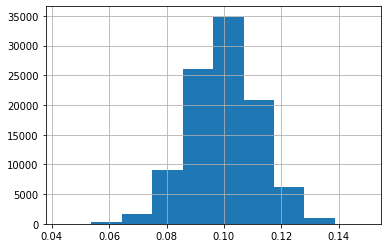

In [12]:
# Y percise
tmp = pd.DataFrame(Y_percise)
tmp[0].hist()
plt.show()

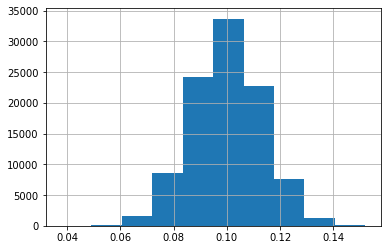

In [13]:
# Y real
tmp = pd.DataFrame(Y)
tmp[0].hist()
plt.show()

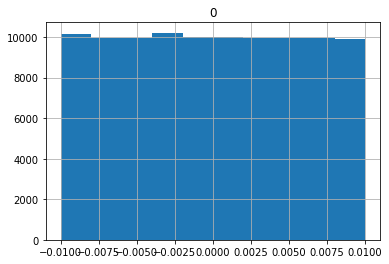

In [14]:
res = pd.DataFrame(Y) - pd.DataFrame(Y_percise)
res.hist()
plt.show()

In [15]:
"""
均匀分布 

0.025 不可控的范围

"""

'\n均匀分布 \n\n0.025 不可控的范围\n\n'

In [16]:
# nk.set_learning_rate(0.01)
# nk.set_learning_rate(0.1)
nk.set_learning_rate(1)
# nk.set_learning_rate(2)
nk.batch_train(X,Y)

In [26]:
x = np.array(random.choices(range(100), k=10))
x = x/x.sum()
y_percise = x.dot(vector) 
# y_real = x.dot(vector) + (random.random()-0.5)*0.05
y_real = x.dot(vector) + (random.random()-0.5)*0.02
y_predict = nk.predict(x)

print('x:',x)
print('y_percise:',y_percise)
print('y_real:',y_real)
print('y_predict:',y_predict)

print('l1:\n',l1.val)
print('l4:\n',l4.val)
pl()

x: [0.00477327 0.13842482 0.03818616 0.18615752 0.03341289 0.06205251
 0.11455847 0.20286396 0.14319809 0.07637232]
y_percise: 0.1266323128789193
y_real: 0.1228687452699321
y_predict: [[0.1273946]]
l1:
 [[-0.00575323 -0.01439807  0.00896524  0.01214657 -0.01327739  0.01797535
   0.04526746  0.00829202 -0.0391766   0.00279878]]
l4:
 [[ 0.0213358   0.02826955  0.01931647 -0.03052827 -0.04249605 -0.0483381
  -0.0029436   0.04572336  0.06008867 -0.01333606]]

####################################################################################################



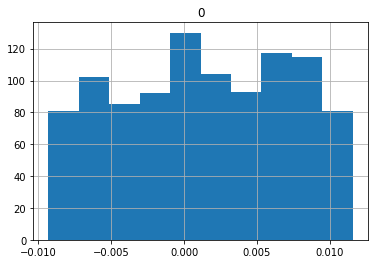

In [18]:
# Pred vs Real
res = []
for i in range(1000):
    x = np.array(random.choices(range(100), k=10))
    x = x/x.sum()
    y_percise = x.dot(vector) 
    y_real = x.dot(vector) + (random.random()-0.5)*0.02
    y_predict = nk.predict(x)
    res.append(y_predict[0][0]-y_real)

#     print('x:',x)
#     print('y_percise:',y_percise)
#     print('y_real:',y_real)
#     print('y_predict:',y_predict)

#     print('l1:\n',l1.val)
#     print('l4:\n',l4.val)
#     pl()
res = pd.DataFrame(res)
res.hist()
plt.show()

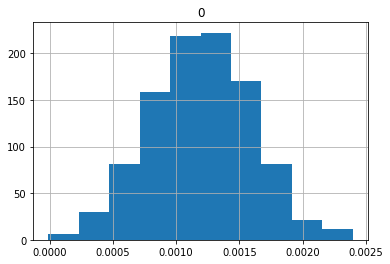

In [19]:
# Pred vs Percise
res = []
for i in range(1000):
    x = np.array(random.choices(range(100), k=10))
    x = x/x.sum()
    y_percise = x.dot(vector) 
    y_real = x.dot(vector) + (random.random()-0.5)*0.02
    y_predict = nk.predict(x)
    res.append(y_predict[0][0]-y_percise)

#     print('x:',x)
#     print('y_percise:',y_percise)
#     print('y_real:',y_real)
#     print('y_predict:',y_predict)

#     print('l1:\n',l1.val)
#     print('l4:\n',l4.val)
#     pl()
res = pd.DataFrame(res)
res.hist()
plt.show()

In [20]:
"""

很精确的

Looks Good
"""

'\n\n很精确的\n\nLooks Good\n'

## Notes

https://app.yinxiang.com/shard/s18/nl/18934792/e81511f4-0b23-48bc-b627-22416bbf9554

In [ ]:
"""


"""